In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from megaman.geometry import Geometry
from sklearn.datasets import make_swiss_roll

from embedding_algorithms import EmbeddingAlgorithms

In [2]:
def generate_random_rotation(n_dimension, random_seed):
    """
    Creates a random matrix that applies a random orthogonal transformation to points (rotation+flip).
    :param n_dimension: Number of dimensions
    :param random_seed: Random seed
    :return: Orthogonal rotation matrix with size (n_dimension X n_dimension)
    """
    rng = np.random.default_rng(random_seed)
    # random matrix
    u_normal = rng.normal(loc=0, scale=1, size=(n_dimension, n_dimension))
    # create a random, orthogonal matrix
    u_orthogonal, _, _ = np.linalg.svd(u_normal)
    return u_orthogonal

In [3]:
def show_highdim_data(data):
    """
    Visualizes the given data on 2D plot
    :param data: The data to be displayed
    :return: None
    """
    # visualize the result in 2d
    fig,ax  = plt.subplots(1, 3, figsize=(9, 3), sharex=True,sharey=True)
    ax[0].scatter(*data[:, :2].T, s=.1, c='black')
    ax[1].scatter(*data[:, 2:4].T, s=.1, c='black')
    ax[2].scatter(*data[:, 4:6].T, s=.1, c='black')
    plt.show()

In [4]:
def show_swiss_roll_data(data, color):
    """
    Using the colors, plots the data (swiss-roll)
    :param data: The data to be displayed
    :param color: Color palette to be displayed
    :return: None
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    fig.add_axes(ax)
    ax.scatter(*data.T, c=color, s=10, alpha=0.8)
    ax.view_init(azim=-66, elev=12)
    plt.show()

In [5]:
def get_highdim_data(n_samples=1000, n_dimension_high=300, noise=1e-3, random_state=1):
    """
    Generates a new high dimensional data using rotation matrix on the Swiss-Roll data. Also, displays the base swiss roll data.
    :param n_samples: Number of samples(rows) to be used
    :param n_dimension_high: Number of dimensions to be used
    :param noise: Noise to be used during generating a swiss roll data
    :param random_state: Random state
    :return: High dimensional data - a matrix with size (n_samples X n_dimension_high)
    """
    # create swissroll data
    data, color = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=random_state)
    # show 3D swiss roll data
    show_swiss_roll_data(data, color)
    # create rotation matrix
    orthogonal_matrix = generate_random_rotation(n_dimension_high, random_seed=random_state)
    # map the swissroll data to higher dimension and rotate it there
    data = np.column_stack([data, np.zeros((data.shape[0], n_dimension_high - data.shape[1]))])
    data = data @ orthogonal_matrix
    # now we have a 2D manifold in n_dimension_high dimensions!
    show_highdim_data(data)
    return data

In [6]:
# set the geometry object for the spectral embedding algorithm

radius = 1.1
geom = Geometry(
    adjacency_kwds={'radius': 3*radius},
    adjacency_method='cyflann',
    affinity_method='gaussian',
    affinity_kwds={'radius': radius},
    laplacian_method='geometric'
)

/home/metehankaya/miniconda3/envs/manifold_env_final/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


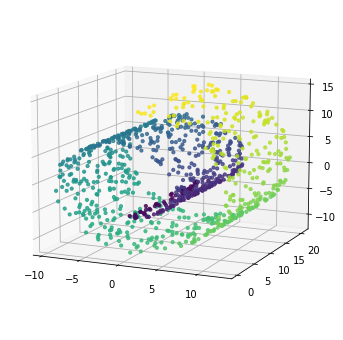

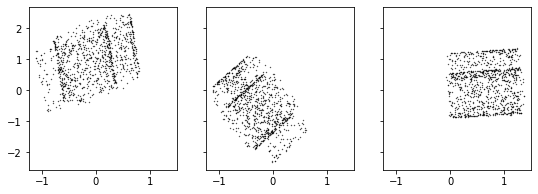

megaman - Spectral Embedding
t0: 2022-07-20 22:09:57.887402
t1: 2022-07-20 22:09:58.388546
Time diff: 0:00:00.501144


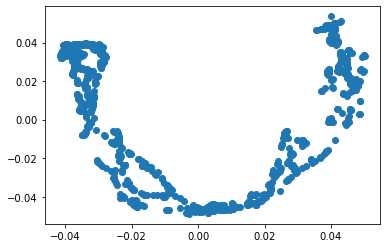

sklearn - Spectral Embedding
t0: 2022-07-20 22:09:58.554255
t1: 2022-07-20 22:09:58.894067
Time diff: 0:00:00.339812


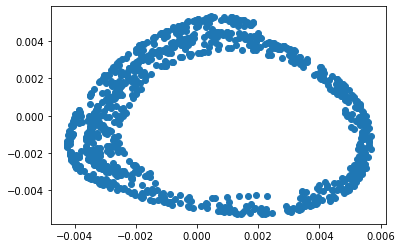

In [7]:
X = get_highdim_data(n_samples = 1000, n_dimension_high = 300)
embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=True)

/home/metehankaya/miniconda3/envs/manifold_env_final/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


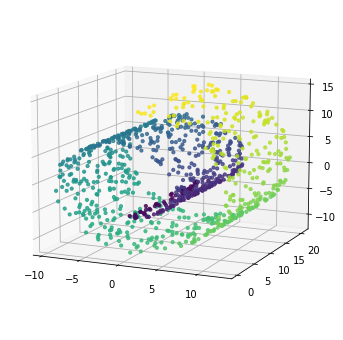

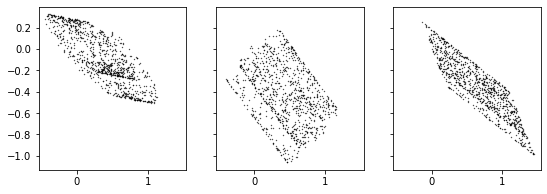

megaman - Spectral Embedding
t0: 2022-07-20 22:09:59.938857
t1: 2022-07-20 22:10:00.277404
Time diff: 0:00:00.338547


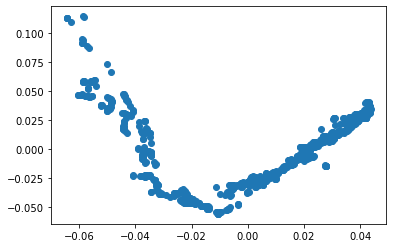

sklearn - Spectral Embedding
t0: 2022-07-20 22:10:00.427220
t1: 2022-07-20 22:10:00.688360
Time diff: 0:00:00.261140


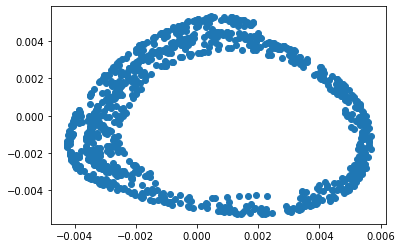

In [8]:
X = get_highdim_data(n_samples = 1000, n_dimension_high = 1000)
embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=True)

/home/metehankaya/miniconda3/envs/manifold_env_final/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


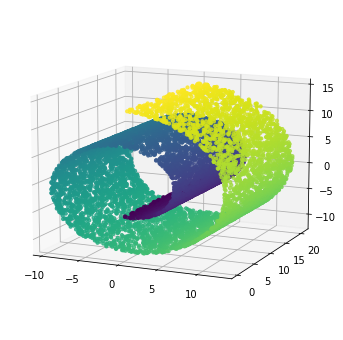

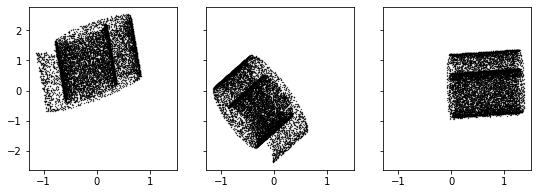

megaman - Spectral Embedding
t0: 2022-07-20 22:10:01.415043
t1: 2022-07-20 22:10:01.826690
Time diff: 0:00:00.411647


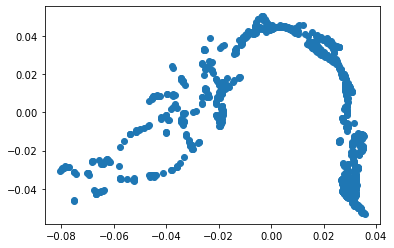

sklearn - Spectral Embedding
t0: 2022-07-20 22:10:01.981650
t1: 2022-07-20 22:12:42.961191
Time diff: 0:02:40.979541


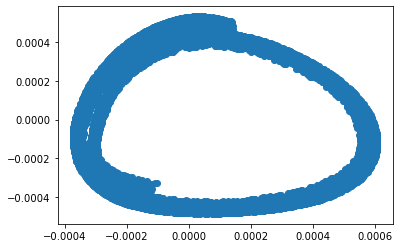

In [9]:
X = get_highdim_data(n_samples = 10000, n_dimension_high = 300)
embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=True)

/home/metehankaya/miniconda3/envs/manifold_env_final/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


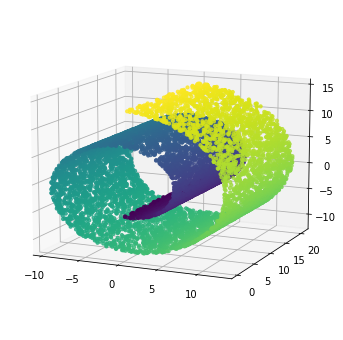

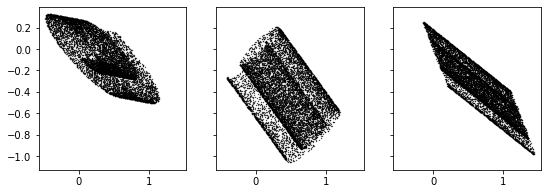

megaman - Spectral Embedding
t0: 2022-07-20 22:12:44.302976
t1: 2022-07-20 22:12:44.807275
Time diff: 0:00:00.504299


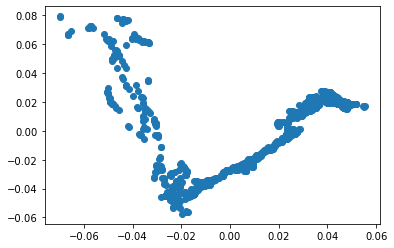

sklearn - Spectral Embedding
t0: 2022-07-20 22:12:44.980645
t1: 2022-07-20 22:15:28.224008
Time diff: 0:02:43.243363


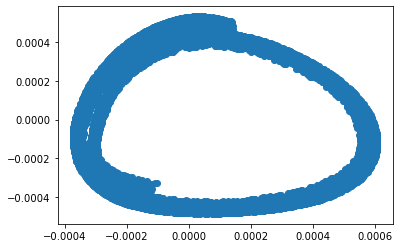

In [10]:
X = get_highdim_data(n_samples = 10000, n_dimension_high = 1000)
embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=True)

/home/metehankaya/miniconda3/envs/manifold_env_final/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


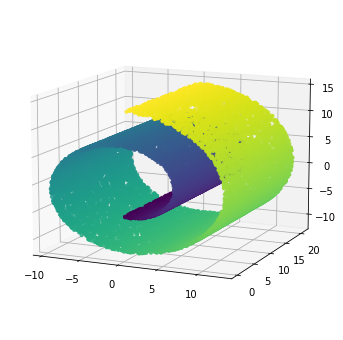

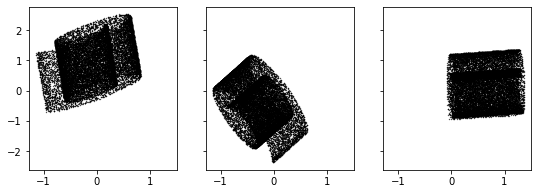

megaman - Spectral Embedding
t0: 2022-07-20 22:15:29.668750
t1: 2022-07-20 22:15:30.432910
Time diff: 0:00:00.764160


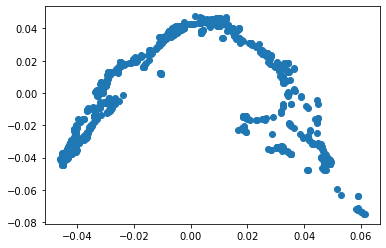

sklearn - Spectral Embedding
t0: 2022-07-20 22:15:30.621345
t1: 2022-07-20 22:38:34.790826
Time diff: 0:23:04.169481


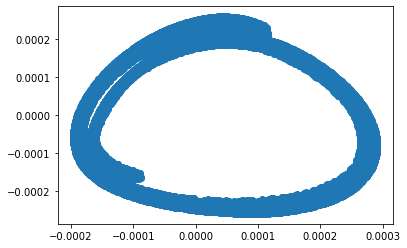

In [11]:
X = get_highdim_data(n_samples = 20000, n_dimension_high = 300)
embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=True)

/home/metehankaya/miniconda3/envs/manifold_env_final/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


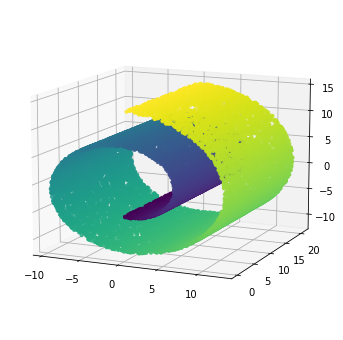

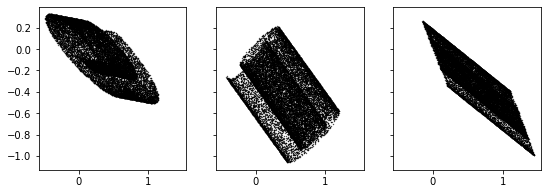

megaman - Spectral Embedding
t0: 2022-07-20 22:38:36.682780
t1: 2022-07-20 22:38:37.122291
Time diff: 0:00:00.439511


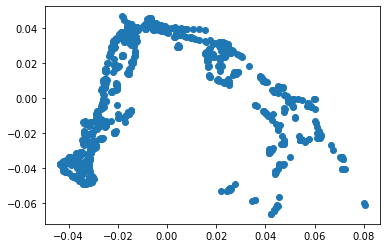

sklearn - Spectral Embedding
t0: 2022-07-20 22:38:37.320351
t1: 2022-07-20 23:00:05.661176
Time diff: 0:21:28.340825


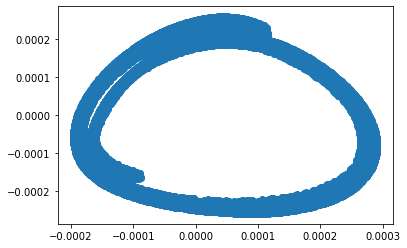

In [12]:
X = get_highdim_data(n_samples = 20000, n_dimension_high = 1000)
embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=True)

/home/metehankaya/miniconda3/envs/manifold_env_final/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


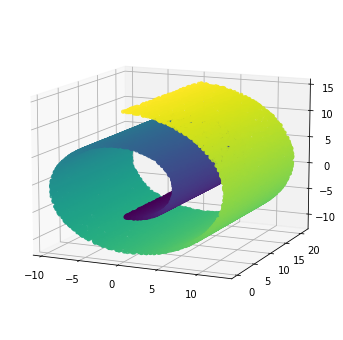

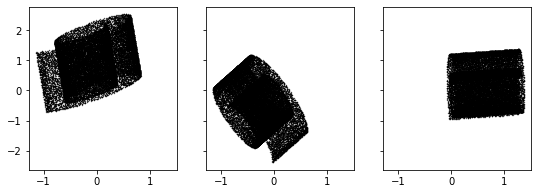

megaman - Spectral Embedding
t0: 2022-07-20 23:00:06.855126
t1: 2022-07-20 23:00:07.418959
Time diff: 0:00:00.563833


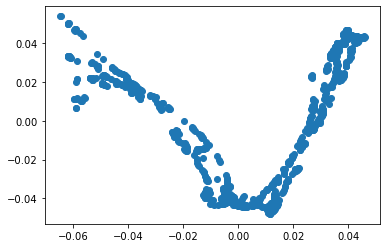

In [13]:
X = get_highdim_data(n_samples = 30000, n_dimension_high = 300)
embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=False)

/home/metehankaya/miniconda3/envs/manifold_env_final/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


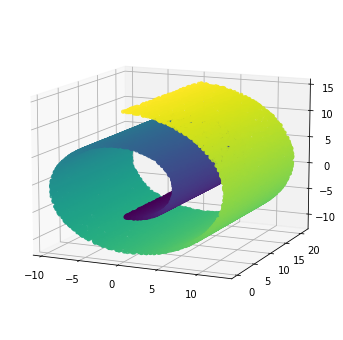

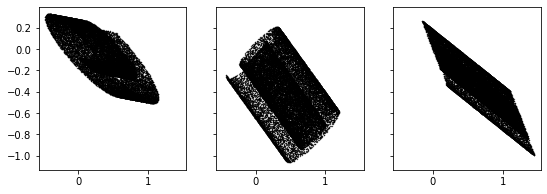

megaman - Spectral Embedding
t0: 2022-07-20 23:00:10.031143
t1: 2022-07-20 23:00:10.468083
Time diff: 0:00:00.436940


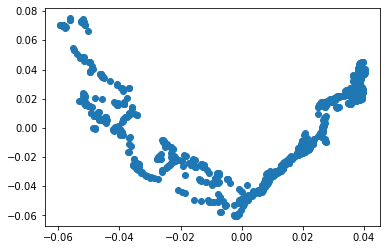

In [14]:
X = get_highdim_data(n_samples = 30000, n_dimension_high = 1000)
embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=False)